# k-Nearest Neighbor (KNN) practice
Basic Image Classification and cross-validation.

In [1]:
import matplotlib.pyplot as plt

# It makes matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules.
%load_ext autoreload
%autoreload 2

In [4]:
from data_utils import load_CIFAR10

# Load the data from each batch.
data_dir = "./datasets/cifar-10-batches-py"
X_train, Y_train, X_test, Y_test = load_CIFAR10(data_dir)

# Check the size of training data and test data.
print "Training data shape: ", X_train.shape
print "Training labels shape: ", Y_train.shape
print "Test date shape: ", X_test.shape
print "Test labels shape: ", Y_test.shape

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test date shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


## Visualize some examples from the dataset.

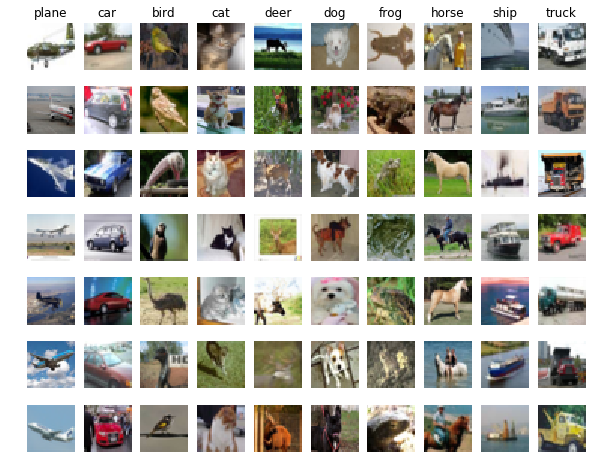

In [6]:
import random
import numpy as np

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(Y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

## Training the model.
**The training process of k-NN is to simply remember the data.**
 

In [20]:
# Initialize a group of tiny dataset.
X_train = np.random.randn(50, 10, 10)
X_test = np.random.randn(10, 10, 10)

In [21]:
# Reshape the image data into rows
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Check the size of lists after reshape.
print "X_train: ", X_train.shape
print "X_test: ", X_test.shape

X_train:  (50, 100)
X_test:  (10, 100)


# Predict the labels of test data.

In [44]:
# Define a group of function to compute the distances between test data and training data.
# Here L2 distance is used.
# By comparing the distances to predict the labels of test data.
def two_loop_distance(X_train, X_test):    
    num_train = X_train.shape[0]
    num_test = X_test.shape[0]
    
    dists = np.zeros((num_test, num_train))

#     print "X_test[2] shape: ", X_test[2].shape
#     print "X_train[2] shape: ", X_train[2].shape
        
    for i in xrange(num_test):
        for j in xrange(num_train):
            dists[i, j] = np.sqrt(np.sum((X_test[i] - X_train[j]) ** 2))
    return dists

def one_loop_distance(X_train, X_test):
    num_train = X_train.shape[0]
    num_test = X_test.shape[0]
    
    dists = np.zeros((num_test, num_train))
    
#     print "X_test[2] shape: ", X_test[2].shape
#     print "X_train shape: ", X_train.shape
        
    for i in xrange(num_test):
        dists[i, :] = np.sqrt(np.sum((X_test[i] - X_train) ** 2, axis = 1))
    return dists
    
def no_loop_distance(X_train, X_test):    
    num_train = X_train.shape[0]
    num_test = X_test.shape[0]
    
#     print "X_test shape: ", X_test.shape
#     print "X_train shape: ", X_train.shape
    
    dists = np.zeros((num_test, num_train))
    
    X_test_square_sum = np.sum(X_test ** 2, axis = 1, keepdims = True)
    X_train_square_sum = np.sum(X_train ** 2, axis = 1)
    dists = np.sqrt(X_test_square_sum + X_train_square_sum - 2 * np.dot(X_test, X_train.T))
    
#     print "====================================="
#     print "X_test_square_sum shape: ", X_test_square_sum.shape
#     print "X_train_square_sum shape: ", X_train_square_sum.shape
#     print "dists shape: ", dists.shape
   
    return dists

# Validate the shape of the three functions above.

dists1 = two_loop_distance(X_train, X_test)
dists2 = one_loop_distance(X_train, X_test)
dists3 = no_loop_distance(X_train, X_test)

X_test[2] shape:  (100,)
X_train[2] shape:  (100,)
X_test[2] shape:  (100,)
X_train shape:  (50, 100)
X_test shape:  (10, 100)
X_train shape:  (50, 100)
X_test_square_sum shape:  (10, 1)
X_train_square_sum shape:  (50,)
dists shape:  (10, 50)


In [47]:
# Use k-NN to predict the labels of test data.
def predict(dists, Y_train, Y_test, k=1):
    # Ensure the shape is matched.
    assert(dists.shape == [Y_test.shape[0], Y_train.shape[0]])
    
    num_test = Y_test.shape[0]
    Y_pred = np.zeros((num_test, 1))
    
    # np.argsort return an array of the indexes of smallest value in the source list.
    for i in xrange(num_test):
        Y_closest = []
        Y_closest = Y_train(np.argsort(dist[i])[:k])
    
        # np.argmax return the value appears for the most time in the source array
        Y_pred[i] = np.argmax(np.bitcount(Y_closest))
        
    return Y_pred  